# Before you start :
   - These exercises are related to the Subsetting and Descriptive Stats lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Challenge 1

#### In this challenge we will use the `Temp_States.csv` file. 

#### First import it into a data frame called `temp`.

In [6]:
temp = pd.read_csv('Temp_States.csv')


#### Print `temp`

In [7]:
temp.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333
3,Hartford,Connecticut,17.222222
4,Bridgeport,Connecticut,14.444444


#### Explore the data types of the Temp dataframe. What type of data do we have? Comment your result.

In [9]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
Temperature,7.0,15.15873,6.695265,3.333333,11.944444,17.222222,19.722222,22.222222


#### Select the rows where state is New York

In [10]:
new_york=temp[temp['State']=='New York']
new_york.head()

,City,State,Temperature
0,NYC,New York,19.444444
1,Albany,New York,9.444444
2,Buffalo,New York,3.333333


#### What is the average of the temperature of cities in New York?

In [11]:
new_york.Temperature.mean()

10.74074074074074

#### We want to know cities and states with Temperature above 15 degress Celcius

In [12]:
temp[temp['Temperature']>=15]

,City,State,Temperature
0,NYC,New York,19.444444
3,Hartford,Connecticut,17.222222
5,Treton,New Jersey,22.222222
6,Newark,New Jersey,20.000000


#### Now, return only the cities that have a temperature above 15 degress Celcius

In [24]:
cities=temp[temp['Temperature']>15].groupby('City').sum()
cities

,Temperature
City,
Hartford,17.222222
NYC,19.444444
Newark,20.000000
Treton,22.222222


#### We want to know which cities have a temperature above 15 degrees Celcius and below 20 degrees Celcius

*Hint: First write the condition then select the rows.*

In [32]:
cond = temp[(temp['Temperature']>15) & (temp['Temperature']<20)]
cities=cond.groupby('City').sum()
cities

,Temperature
City,
Hartford,17.222222
NYC,19.444444


#### Find the mean and the standard deviation of the temperature of each state.

*Hint: Use functions from Data Manipulation lesson*

In [39]:
grupo = temp.groupby('State')
res = grupo['Temperature'].agg([np.mean, np.std])
res

,mean,std
State,,
Connecticut,15.833333,1.964186
New Jersey,21.111111,1.571348
New York,10.740741,8.133404


# Challenge 2

#### Load the `employee.csv` file into a DataFrame. Call the dataframe `employee`

In [40]:
employee = pd.read_csv('employee.csv')

#### Explore the data types of the Temp dataframe. Comment your results

In [50]:

employee.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        9 non-null      object
 1   Department  9 non-null      object
 2   Education   9 non-null      object
 3   Gender      9 non-null      object
 4   Title       9 non-null      object
 5   Years       9 non-null      int64 
 6   Salary      9 non-null      int64 
dtypes: int64(2), object(5)
memory usage: 3.0 KB


#### Show visually the frequency distribution (histogram) of the employee dataset. In few words describe these histograms?

(array([1., 3., 1., 0., 1., 0., 0., 0., 1., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

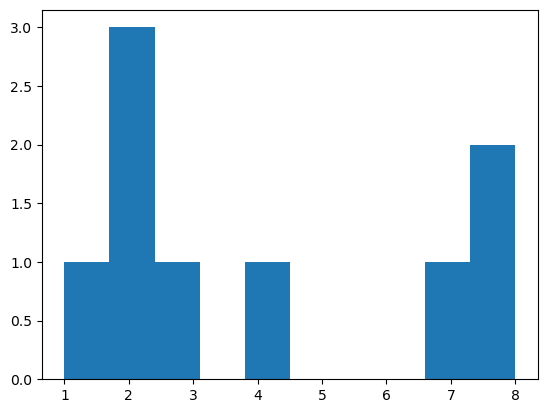

In [56]:
plt.hist(employee['Years'])


(array([2., 2., 0., 0., 0., 0., 2., 1., 0., 2.]),
 array([30., 34., 38., 42., 46., 50., 54., 58., 62., 66., 70.]),
 <BarContainer object of 10 artists>)

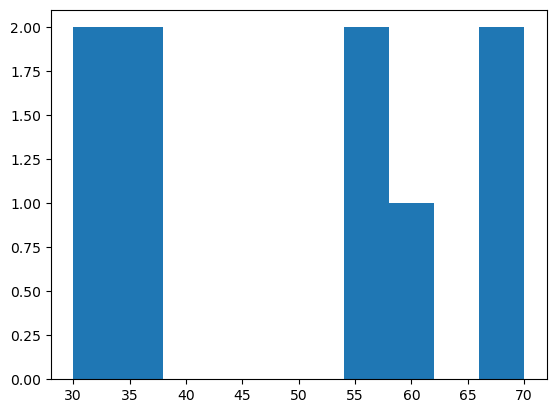

In [57]:
plt.hist(employee['Salary'])

#### What's the average salary in this company?

In [59]:
employee['Salary'].mean()

48.888888888888886

#### What's the highest salary?

In [60]:
employee['Salary'].max()

70

#### What's the lowest salary?

In [61]:
employee['Salary'].min()

30

#### Who are the employees with the lowest salary?

In [65]:
lowest_paid_employees = employee.loc[employee['Salary'] ==  employee['Salary'].min()]
lowest_paid_employees

,Name,Department,Education,Gender,Title,Years,Salary
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Could you give all the information about an employee called David?

In [66]:
employee.loc[employee['Name'] ==  'David']

,Name,Department,Education,Gender,Title,Years,Salary
2,David,HR,Master,M,analyst,2,30


#### Could you give only David's salary?

In [70]:
employee.loc[employee['Name'] ==  'David'].Salary

2    30
Name: Salary, dtype: int64

#### Print all the rows where job title is associate

In [79]:
employee.loc[employee['Title'].str.contains('associate')]

,Name,Department,Education,Gender,Title,Years,Salary
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
7,Pedro,IT,Phd,M,associate,7,60


#### Print the first 3 rows of your dataframe

##### Tip : There are 2 ways to do it. Do it both ways

In [80]:
employee.head(3)

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


In [81]:
employee[0:3]

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30


#### Find the employees who's title is associate and the salary above 55?

In [82]:
employee.loc[(employee['Title'].str.contains('associate')) & (employee['Salary']>55)]


,Name,Department,Education,Gender,Title,Years,Salary
7,Pedro,IT,Phd,M,associate,7,60


#### Group the employees based on their number of years of employment. What are the average salaries in each group?

In [97]:
depa_year =employee.groupby('Years')
depa_year.mean()

,Salary
Years,
1,35.000000
2,38.333333
3,55.000000
4,35.000000
7,60.000000
8,70.000000


####  What is the average Salary per title?

In [106]:
ave_sal= employee[['Salary','Title']].groupby('Title')
ave_sal.mean()

,Salary
Title,
VP,70.000000
analyst,32.500000
associate,56.666667


#### Show a visual summary of the data using boxplot. What Are the First and Third Quartiles? Comment your results.
##### * Hint : Quantiles vs Quartiles*
##### - `In Probability and Statistics, quantiles are cut points dividing the range of a probability distribution into continuous intervals with equal probabilities. When division is into four parts the values of the variate corresponding to 25%, 50% and 75% of the total distribution are called quartiles.`

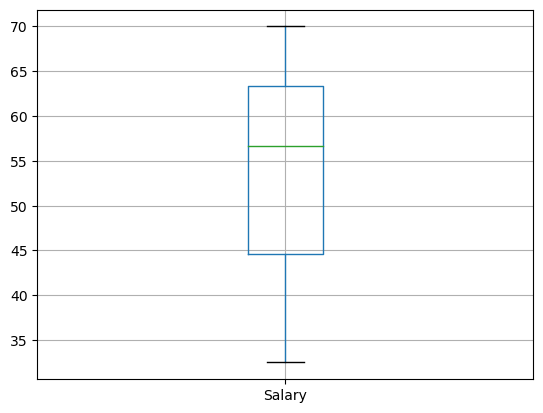

In [116]:
result = ave_sal.mean()
result.boxplot(column='Salary')
plt.show()

In [117]:
employee.Salary.quantile(.25)

35.0

In [118]:
employee.Salary.quantile(.75)

60.0

#### Is the mean salary per gender different?

In [121]:
employee[['Salary','Gender']].groupby('Gender').sum()

,Salary
Gender,
F,190
M,250


#### Find the minimum, mean and the maximum of all numeric columns for each Department.

##### Hint: Use functions from Data Manipulation lesson

In [122]:
employee.groupby('Department').agg(['min', 'mean', 'max'])

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_18820\2432639595.py:1: FutureWarning: ['Name', 'Education', 'Gender', 'Title'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  employee.groupby('Department').agg(['min', 'mean', 'max'])


Years               Salary           
             min      mean max    min   mean max
Department                                      
HR             2  4.666667   8     30  45.00  70
IT             1  4.500000   8     30  48.75  70
Sales          2  2.500000   3     55  55.00  55

### Bonus Question

#### For each department, compute the difference between the maximal salary and the minimal salary.

##### * Hint: try using `agg` or `apply` and `lambda`*

In [32]:
# your answer here

# Challenge 3

#### Open the Orders.csv dataset. Name your dataset orders

In [125]:
orders = pd.read_csv('Orders.csv')

#### Explore your dataset by looking at the data types and the summary statistics. Comment your results

In [126]:
orders.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397924 entries, 0 to 397923
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    397924 non-null  int64  
 1   InvoiceNo     397924 non-null  int64  
 2   StockCode     397924 non-null  object 
 3   year          397924 non-null  int64  
 4   month         397924 non-null  int64  
 5   day           397924 non-null  int64  
 6   hour          397924 non-null  int64  
 7   Description   397924 non-null  object 
 8   Quantity      397924 non-null  int64  
 9   InvoiceDate   397924 non-null  object 
 10  UnitPrice     397924 non-null  float64
 11  CustomerID    397924 non-null  int64  
 12  Country       397924 non-null  object 
 13  amount_spent  397924 non-null  float64
dtypes: float64(2), int64(8), object(4)
memory usage: 141.2 MB


In [128]:
orders.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,397924.0,278465.221859,152771.368303,0.0,148333.75,284907.50,410079.25,541908.00
InvoiceNo,397924.0,560617.126645,13106.167695,536365.0,549234.00,561893.00,572090.00,581587.00
year,397924.0,2010.934259,0.247829,2010.0,2011.00,2011.00,2011.00,2011.00
month,397924.0,7.612537,3.416527,1.0,5.00,8.00,11.00,12.00
day,397924.0,3.614555,1.928274,1.0,2.00,3.00,5.00,7.00
hour,397924.0,12.728247,2.273535,6.0,11.00,13.00,14.00,20.00
Quantity,397924.0,13.021823,180.420210,1.0,2.00,6.00,12.00,80995.00
UnitPrice,397924.0,3.116174,22.096788,0.0,1.25,1.95,3.75,8142.75
CustomerID,397924.0,15294.315171,1713.169877,12346.0,13969.00,15159.00,16795.00,18287.00
amount_spent,397924.0,22.394749,309.055588,0.0,4.68,11.80,19.80,168469.60


####  What is the average Purchase Price?

In [130]:
orders['UnitPrice'].mean()

3.116174480549152

#### What were the highest and lowest purchase prices? 

In [131]:
orders['UnitPrice'].max()

8142.75

In [132]:
orders['UnitPrice'].min()

0.0

#### Select all the customers we have in Spain

In [139]:
orders[orders['Country'] == 'Spain']

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.00
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.50
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394733,535271,581193,23291,2011,12,3,17,dolly girl childrens cup,2,2011-12-07 17:05:00,1.25,17097,Spain,2.50
394734,535272,581193,85232D,2011,12,3,17,set/3 decoupage stacking tins,1,2011-12-07 17:05:00,4.95,17097,Spain,4.95
394735,535273,581193,22721,2011,12,3,17,set of 3 cake tins sketchbook,2,2011-12-07 17:05:00,1.95,17097,Spain,3.90
394736,535274,581193,23241,2011,12,3,17,treasure tin gymkhana design,1,2011-12-07 17:05:00,2.08,17097,Spain,2.08


#### How many customers do we have in Spain?
##### Hint : Use value_counts()

In [146]:
sp_cus= orders['Country'] == 'Spain'
sp_cus.sum()

2485

#### Select all the customers who have bought more than 50 items ?

In [148]:
orders.loc[(orders['Quantity']>50)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
46,46,536371,22086,2010,12,3,9,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748,United Kingdom,204.00
83,83,536376,21733,2010,12,3,9,red hanging heart t-light holder,64,2010-12-01 09:32:00,2.55,15291,United Kingdom,163.20
96,96,536378,21212,2010,12,3,9,pack of 72 retrospot cake cases,120,2010-12-01 09:37:00,0.42,14688,United Kingdom,50.40
102,102,536378,85071B,2010,12,3,9,red charlie+lola personal doorsign,96,2010-12-01 09:37:00,0.38,14688,United Kingdom,36.48
174,176,536386,85099C,2010,12,3,9,jumbo bag baroque black white,100,2010-12-01 09:57:00,1.65,16029,United Kingdom,165.00


#### Select orders from Spain that are above 50 items

In [150]:
orders.loc[(orders['Country']=='Spain') &(orders['Quantity']>50)].head()


,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
4250,6421,536944,22383,2010,12,5,12,lunch bag suki design,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4251,6422,536944,22384,2010,12,5,12,lunch bag pink polkadot,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0
4252,6423,536944,20727,2010,12,5,12,lunch bag black skull.,60,2010-12-03 12:20:00,1.65,12557,Spain,99.0
4253,6424,536944,20725,2010,12,5,12,lunch bag red retrospot,70,2010-12-03 12:20:00,1.65,12557,Spain,115.5
4254,6425,536944,20728,2010,12,5,12,lunch bag cars blue,100,2010-12-03 12:20:00,1.45,12557,Spain,145.0


#### Select all free orders

In [153]:
orders.loc[(orders['amount_spent']==0)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
6914,9302,537197,22841,2010,12,7,14,round cake tin vintage green,1,2010-12-05 14:02:00,0.0,12647,Germany,0.0
22539,33576,539263,22580,2010,12,4,14,advent calendar gingham sack,4,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0
25379,40089,539722,22423,2010,12,2,13,regency cakestand 3 tier,10,2010-12-21 13:45:00,0.0,14911,EIRE,0.0
29080,47068,540372,22090,2011,1,4,16,paper bunting retrospot,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0
29082,47070,540372,22553,2011,1,4,16,plasters in tin skulls,24,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0


#### Select all orders that are 'lunch bag'
#### Hint: Use string functions

In [155]:
orders.loc[(orders['Description'].str.contains('lunch bag'))].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
93,93,536378,20725,2010,12,3,9,lunch bag red retrospot,10,2010-12-01 09:37:00,1.65,14688,United Kingdom,16.50
172,174,536385,22662,2010,12,3,9,lunch bag dolly girl design,10,2010-12-01 09:56:00,1.65,17420,United Kingdom,16.50
354,363,536401,22662,2010,12,3,11,lunch bag dolly girl design,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
359,368,536401,20725,2010,12,3,11,lunch bag red retrospot,1,2010-12-01 11:21:00,1.65,15862,United Kingdom,1.65
360,369,536401,22382,2010,12,3,11,lunch bag spaceboy design,2,2010-12-01 11:21:00,1.65,15862,United Kingdom,3.30


#### Select all orders that are made in 2011 and are 'lunch bag'  

In [158]:
orders.loc[(orders['Description'].str.contains('lunch bag')) & (orders['year']== 2011)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678,540015,20725,2011,1,2,11,lunch bag red retrospot,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26341,42679,540015,20726,2011,1,2,11,lunch bag woodland,10,2011-01-04 11:40:00,1.65,13319,United Kingdom,16.50
26512,42851,540023,22382,2011,1,2,12,lunch bag spaceboy design,2,2011-01-04 12:58:00,1.65,15039,United Kingdom,3.30
26513,42852,540023,20726,2011,1,2,12,lunch bag woodland,1,2011-01-04 12:58:00,1.65,15039,United Kingdom,1.65
26860,43616,540098,22384,2011,1,2,15,lunch bag pink polkadot,1,2011-01-04 15:50:00,1.65,16241,United Kingdom,1.65


#### Show the frequency distribution of the amount spent in Spain.

<AxesSubplot:xlabel='amount_spent', ylabel='Count'>

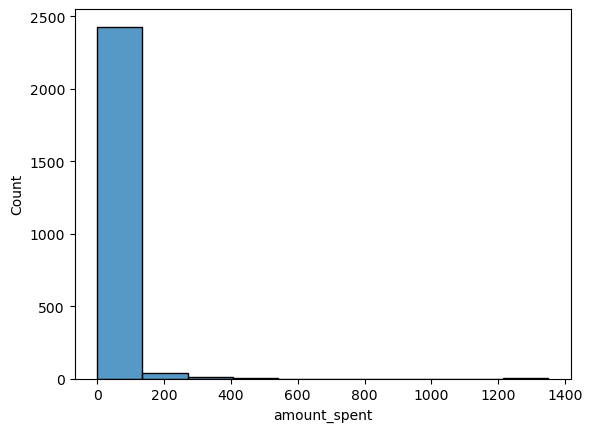

In [164]:
sns.histplot(orders.amount_spent.loc[(orders['Country']=='Spain')],bins=10)

#### Select all orders made in the month of August

In [167]:
orders.loc[(orders['month']==8)].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421,561904,22075,2011,8,1,8,6 ribbons elegant christmas,96,2011-08-01 08:30:00,1.45,17941,United Kingdom,139.20
199476,285422,561904,85049E,2011,8,1,8,scandinavian reds ribbons,156,2011-08-01 08:30:00,1.06,17941,United Kingdom,165.36
199477,285423,561905,21385,2011,8,1,9,ivory hanging decoration heart,24,2011-08-01 09:31:00,0.85,14947,United Kingdom,20.40
199478,285424,561905,84970L,2011,8,1,9,single heart zinc t-light holder,12,2011-08-01 09:31:00,0.95,14947,United Kingdom,11.40
199479,285425,561905,84970S,2011,8,1,9,hanging heart zinc t-light holder,12,2011-08-01 09:31:00,0.85,14947,United Kingdom,10.20


#### Select how many orders are made by countries in the month of August
##### Hint: Use value_counts()

In [173]:
orders[['Country', 'month']].loc[(orders['month']==8)].groupby('Country').sum()

,month
Country,
Australia,856
Austria,704
Belgium,1552
Canada,40
Channel Islands,1120
Denmark,128
EIRE,4744
Finland,488
France,4552


#### What's the  average amount of money spent by country

In [175]:
orders[['Country', 'amount_spent']].groupby('Country').mean()

,amount_spent
Country,
Australia,116.895620
Austria,25.624824
Bahrain,32.258824
Belgium,20.283772
Brazil,35.737500
Canada,24.280662
Channel Islands,27.340160
Cyprus,22.134169
Czech Republic,33.069600


#### What's the most expensive item?

In [190]:
orders.loc[orders.UnitPrice==orders.UnitPrice.max()].head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
118352,173382,551697,POST,2011,5,2,13,postage,1,2011-05-03 13:46:00,8142.75,16029,United Kingdom,8142.75


#### What was the average amount spent per year ?

In [176]:
orders[['year', 'amount_spent']].groupby('year').mean()

,amount_spent
year,
2010,21.892733
2011,22.430074
